Simple Linear Regression

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 0, 'Height')

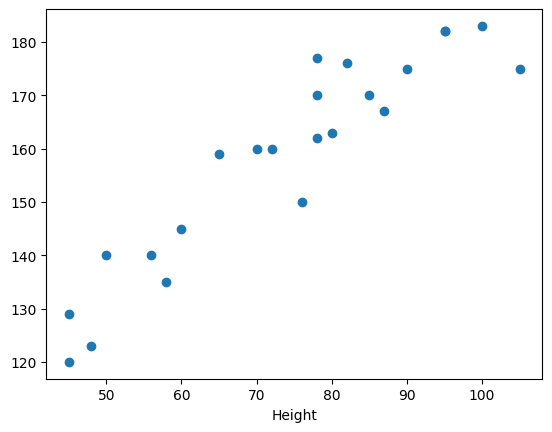

In [3]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.xlabel("Height")

When train Machine learning algorthims there are few steps:
1. Dataset
2. Divide the feature based on independent and dependent features. 
3. Train test split of the dataset
4. Standardize the dataset
5. Training the model. -- here using linear regression

In [4]:
# divide in independent and dependent features. 

X=df[['Weight']] # independent feature 
y=df["Height"] # dependent feature

In [5]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [6]:
X.shape, X_train.shape, X_test.shape

((23, 1), (18, 1), (5, 1))

In [7]:
## Standardize the dataset Train independent data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train.head()
x

,Weight
12,105
1,58
13,100
5,78
2,48


In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'y train')

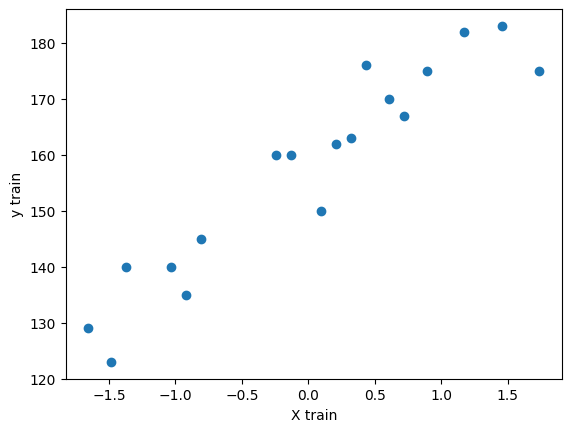

In [10]:
# diagram after Standardization
plt.scatter(X_train, y_train)
plt.xlabel("X train")
plt.ylabel("y train")

In [11]:
## Train Simple Linear Regression model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [12]:
regressor.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
print('The slope or coefficient of weight is ',regressor.coef_)
print('Intercept ',regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercept  157.5


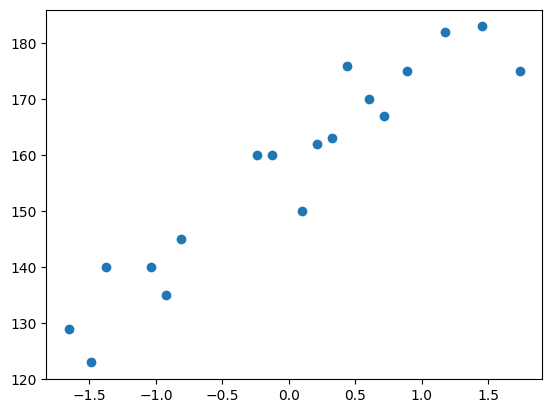

In [14]:
plt.scatter(X_train, y_train)

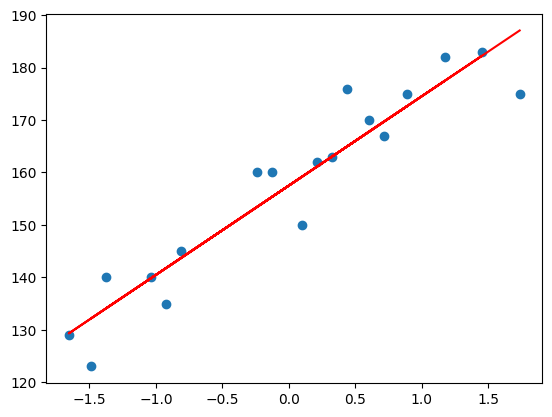

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

prdiction of train data
1. predicted height output = intercept + coef_(weights)
2. y_pred_train = 157.5 + 17.03(X_train)

prediction of test data
1. predicted height output = intercept + coef_(weights)
2. y_pred_test = 157.5 + 17.03(X_test)

In [16]:
y_pred_test = regressor.predict(X_test)

In [18]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

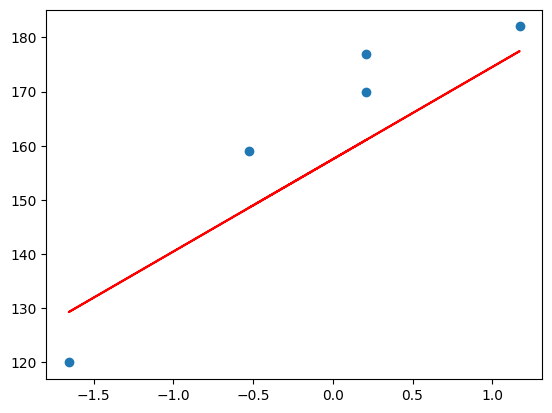

In [19]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')

Performance Metrics: 
MSE, MAE, RMSE
R square and Adusted R square

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mse = mean_squared_error(y_test, y_pred_test)
print("mse", mse)
mae = mean_absolute_error(y_test, y_pred_test)
print("mae", mae)
rmse = np.sqrt(mse)
print("rmse", rmse)

mse 109.77592599051664
mae 9.822657814519232
rmse 10.477400726827081


In [23]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)

In [24]:
score

0.776986986042344

In [25]:
# adjusted r-squared

1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [26]:
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
## new data point weight is 80

scaled_weight = scaler.transform([[80]])
scaled_weight

d:\Krish ML courses\ML Course\venvMLcourse\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [29]:
regressor.predict(scaled_weight)

array([163.01076266])

In [37]:
regressor.predict([[80]])

array([1520.25269753])

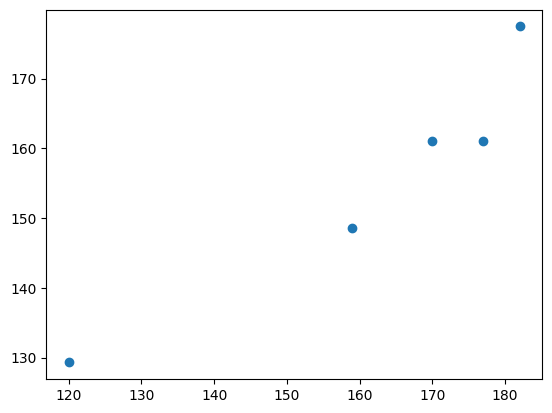

In [31]:
## Assumptions
# Plot a scatter plot for the prediction 
plt.scatter(y_test, y_pred_test)


In [32]:
# Residuals
residuals = y_test - y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_13088\346548661.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


<Axes: xlabel='Height', ylabel='Density'>

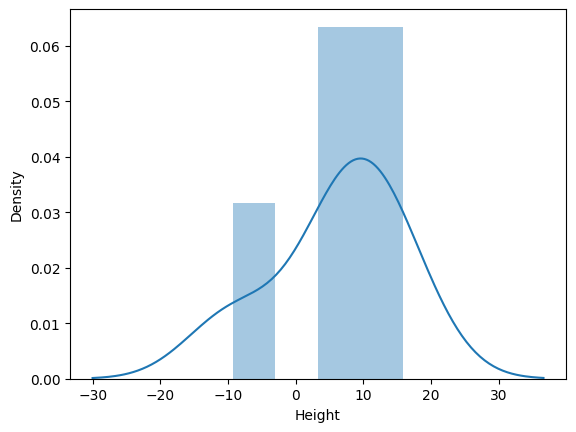

In [34]:
# plot this residuals
import seaborn as sns
sns.distplot(residuals, kde=True)


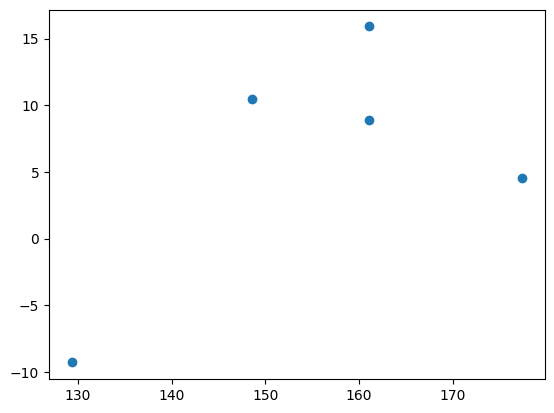

In [ ]:
# scatter plot with r.t prediction and residuals
# unifrom distribution , if unifrom then good model
plt.scatter(y_pred_test, residuals)

In [36]:
## pickling the model